# Import Python Libraries

In [147]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import lasio
import re
import base64

In [148]:
%config Completer.use_jedi = False

# Import Files

In [150]:
# Import and read Lasio Files
file1 = r"C:\Users\fredd\OneDrive - Escuela Superior Politécnica del Litoral\Escritorio\Python\Oil and Gas Data\ACAC-167.las"
file2 = "https://raw.githubusercontent.com/Tyrmes/gtx-2021/master/prototyping/resources/well_logs/ACAF-136.las?token=ANY2IACAOIAZ24SIGFQF3SDAU2LEY"
file3 = "https://raw.githubusercontent.com/Tyrmes/gtx-2021/master/prototyping/resources/well_logs/CHSA-005.las?token=ANY2IAAUVOSTNVYBR6DJ46LAU2LIG"
file4 = "https://raw.githubusercontent.com/Tyrmes/gtx-2021/master/prototyping/resources/well_logs/CLB-005.las?token=ANY2IACRO3EW43TAEFQKAATAU2LL4"
file5 = "https://raw.githubusercontent.com/Tyrmes/gtx-2021/master/prototyping/resources/well_logs/CLBB-034.las?token=ANY2IADQKSYPS6GUXQLEWOTAU2LOE"

# Read Files

In [151]:
data = lasio.read(file1)
data.keys()

['DEPT',
 'RT',
 'SP',
 'GR',
 'PEF',
 'RHOB',
 'NPHI',
 'PERM_COAT_F3',
 'PHIT_D_F3',
 'PHIE_D_F3',
 'SWE_SIM_F3',
 'VSH_FINAL_F3',
 'EVENTOS',
 'PERM_COAT_MW',
 'PAY_NET_FLAG_MW',
 'PHIE_D_MW',
 'PHIT_D_MW',
 'R35_WINLAND_MW',
 'RES_NET_FLAG_MW',
 'SWE_IND_MW',
 'VSH_FINAL_MW',
 'ROCK_TH',
 'RES_TH',
 'PAY_TH']

# Funtions to generate titles and plots of well logs using plotly

In [152]:
def generate_axis_title(descr, unit):
    title_words = descr.split(' ')

    current_line = ''
    lines = []
    for word in title_words:
        if len(current_line) + len(word) > 15:
            lines.append(current_line[:-1])
            current_line = ''
        current_line += '{} '.format(word)
    lines.append(current_line)

    title = '<br>'.join(lines)
    title += '<br>({})'.format(unit)

    return title

In [159]:
def generate_curves(data,
        height=950, width=800,
        bg_color='white',
        font_size=10,
        tick_font_size=8,
        line_width=0.5
):
    # include one graph for all curves, since they have the same x axis
    yvals = 'DEPT'

    cols = list(data.curves.keys())

    plots = []

    plots.append(['SP'])
    plots.append(['GR'])
    plots.append(['VSH_FINAL_MW'])
    plots.append(['RHOB', 'NPHI'])
    #plots.append(['NPHI'])
    
    fig = make_subplots(rows=1, cols=len(plots),
                              shared_yaxes=True,
                              horizontal_spacing=0)

    for i in range(len(plots)):
        for column in plots[i]:
            fig.add_trace(go.Scatter(
                x=data.curves[column].data,
                y=data.curves[yvals].data,
                name=column,
                line={'width': line_width,
                      'dash': 'solid'},
            ), row=1, col=i+1)
            fig['layout']['xaxis{}'.format(i+1)].update(
                title=generate_axis_title(
                    data.curves[plots[i][0]]['descr'],
                    data.curves[plots[i][0]]['unit']
                ),
                type='linear'
            )

    #fig['data'][1]['xaxis'] = 'x5'
    fig['data'][4]['xaxis'] = 'x5'
    
    #GR on graph 1
    #fig['layout']['xaxis5'] = dict(
    #    overlaying='x1',
    #    anchor='y',
    #    side='top',
    #    title=generate_axis_title(
    #        data.curves['SP']['descr'],
    #        data.curves['SP']['unit']
    #    )
    #)

    #NPHI on graph 4
    fig['layout']['xaxis5'] = dict(
        overlaying='x4',
        anchor='y',
        side='top',
        title=generate_axis_title(
            data.curves['NPHI']['descr'],
            data.curves['NPHI']['unit']
        )
    )

    # y axis title
    fig['layout']['yaxis'].update(
        title=generate_axis_title(
            data.curves[yvals]['descr'],
            data.curves[yvals]['unit']
        ),
        autorange='reversed'
    )

    for axis in fig['layout']:
        if re.search(r'[xy]axis[0-9]*', axis):
            fig['layout'][axis].update(
                mirror='all',
                automargin=True,
                showline=True,
                title=dict(
                    font=dict(
                        family='Arial, sans-serif',
                        size=font_size
                    )
                ),
                tickfont=dict(
                    family='Arial, sans-serif',
                    size=tick_font_size
                )
            )    

    fig['layout'].update(
        height=height,
        width=width,
        plot_bgcolor=bg_color,
        paper_bgcolor=bg_color,
        hovermode='y',
        legend={
            'font': {
                'size': tick_font_size
            }
        },
        margin=go.layout.Margin(
            r=100
        )
    )

    return fig.show()

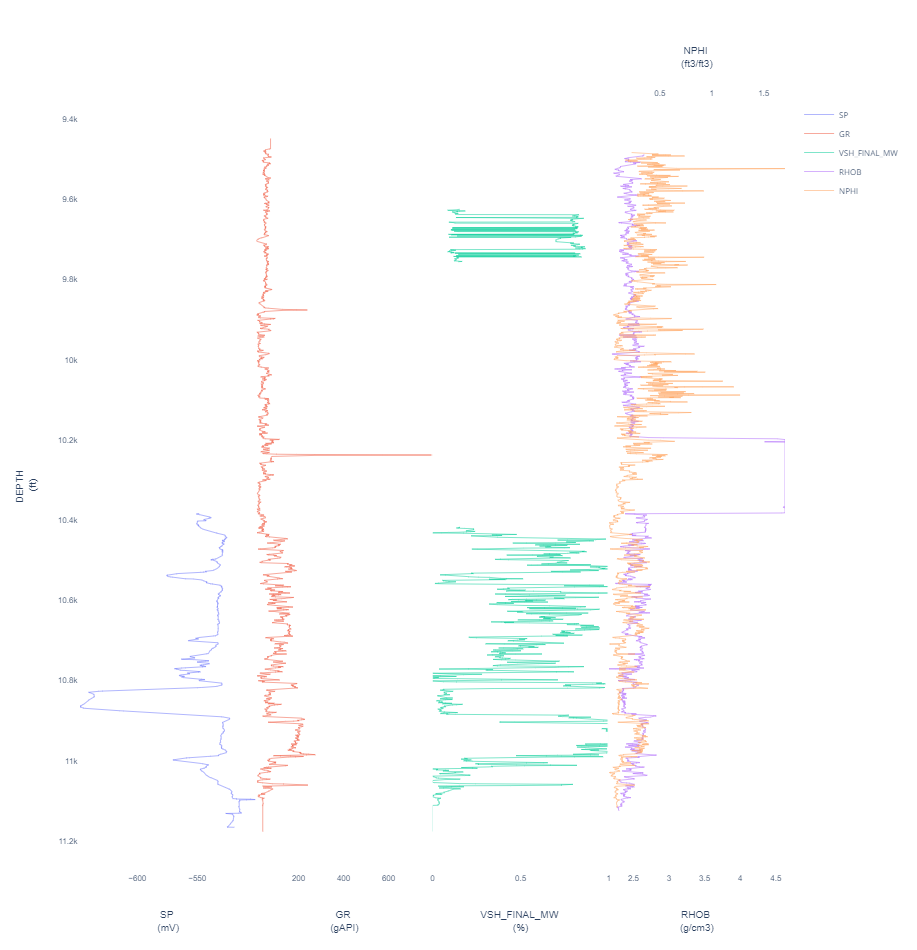

In [160]:
generate_curves(data)